<a href="https://colab.research.google.com/github/minsoojo/MLprogramming/blob/main/4week/diabetes(BMI)_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# -----------------------------

# 1) 데이터 준비 (회귀용)

# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/3-2/MLprogramming/1week/diabetes.csv").dropna()

In [31]:
X = df.drop(columns=["BMI"])
y = df["BMI"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [35]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)   # ★ 출력층: 연속값 → 활성화 함수 없음
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"])

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

In [40]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test mse: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

Test mse: 66.5335
Test MAE: 5.5037


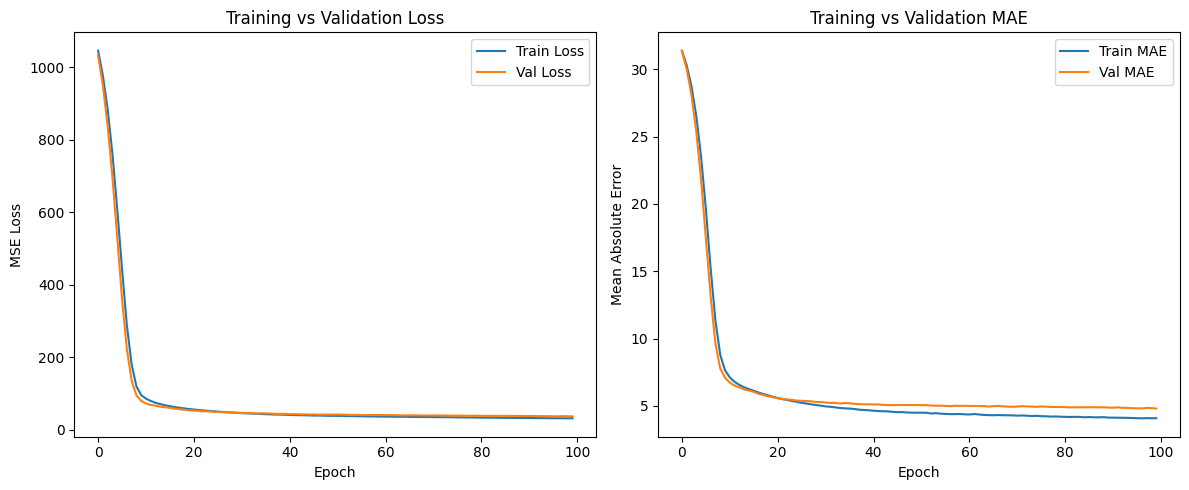

In [38]:
import matplotlib.pyplot as plt

# -----------------------------
# 6. 학습 곡선 시각화
# -----------------------------
plt.figure(figsize=(12,5))

# Loss (MSE)
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training vs Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()
